In [1]:
import numpy as np
from matplotlib import pyplot as plt

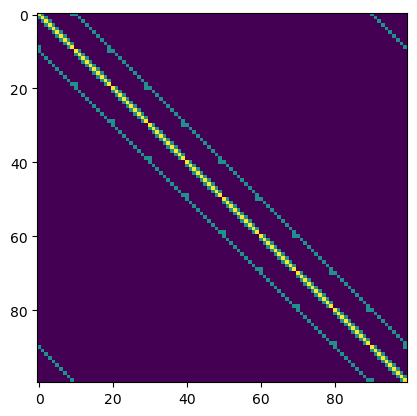

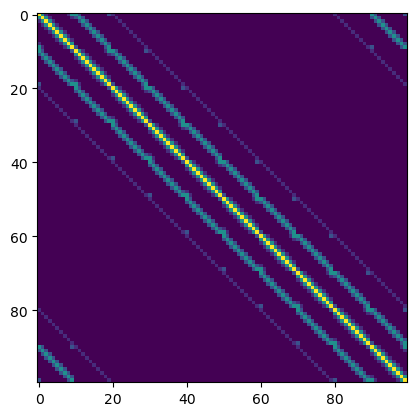

In [188]:
Nx = 10
Nstate = Nx*Nx
#Ny = 5
Ny = 1
obs_positions = [[5,5]]
if Ny == 3:
    obs_positions = [[2,2], [8,2], [5,5]]

if Ny == 5:
    obs_positions = [[2,2], [8,2], [2,8], [8,8], [5,5]]
Q = np.zeros((Nstate, Nstate))

def idx(x, shift=[0, 0]):
    return ((x[1] + shift[1])%Nx)*Nx + (x[0] + shift[0])%Nx

# Construct Q
for y in range(Nx):
    for x in range(Nx):
        
        i = idx([y, x])
        Q[i, i] = 1.0
        for shift in [[1,0], [-1,0], [0,1], [0,-1]]:
            j = idx([y, x], shift)
            Q[i, j] = 0.5
            Q[j, i] = 0.5

plt.imshow(Q)
plt.figure()
plt.imshow(Q@Q)

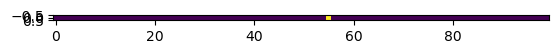

In [189]:
# Construct H
H = np.zeros((Ny, Nstate))
for j, obs in enumerate(obs_positions):
    i = idx(obs)
    H[j, i] = 1

plt.imshow(H)

[55.]


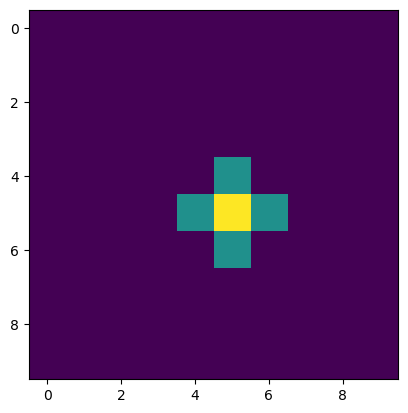

In [190]:
def asState(v):
    return v.reshape(Nx, Nx)
def imshow(f):
    plt.figure()
    plt.imshow(f)
def plotState(v):
    imshow(asState(v))

x = np.arange(Nstate)
y = H @ x
print(y)

QHTy = Q@(H.T @ y)
plotState(QHTy)

In [191]:
def nnz(A):
    print("Shape: ", A.shape)
    print("nnz: ", np.count_nonzero(A))

nnz(Q)

Shape:  (100, 100)
nnz:  500


In [192]:
Sd = np.diag(np.random.rand(Ny))
print(Sd)
S = np.random.rand(Ny, Ny)
print(S)

[[0.45737046]]
[[0.97201303]]


Shape:  (100, 1)
nnz:  5


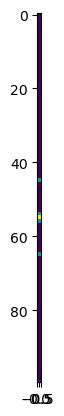

In [193]:
QHTS = Q@H.T@Sd
plt.imshow(QHTS)
nnz(QHTS)

(100, 1)
Shape:  (100, 1)
nnz:  5
Shape:  (100, 1)
nnz:  13


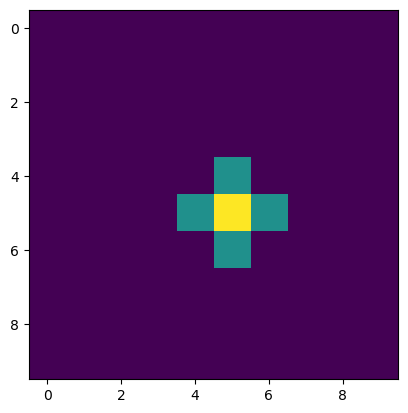

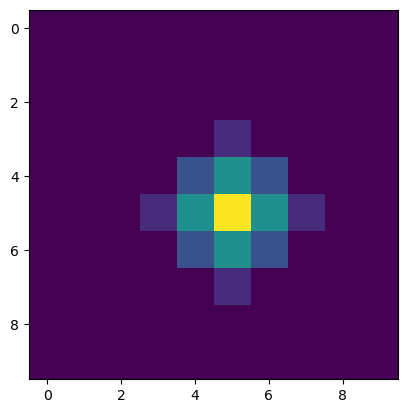

In [197]:
print(QHTS.shape)
plotState(QHTS[:,0])
nnz(QHTS)

QQHTS = Q@QHTS
nnz(QQHTS)
plotState(QQHTS[:,0])




\begin{equation}
\bm{P} = Q^{1/2 \top} \Big( I_{Nx} - Q^{1/2} H^{\top} ( H Q H^{\top} +R)^{-1} H Q^{1/2 \top} \Big) Q^{1/2}
\end{equation}

Shape:  (1, 100)
nnz:  5


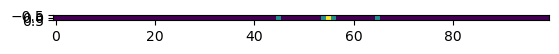

In [198]:
HQ = H@Q.T
nnz(HQ)
plt.imshow(HQ)

Shape:  (1, 100)
nnz:  5
Shape:  (1, 100)
nnz:  5


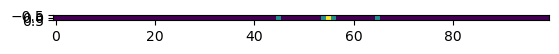

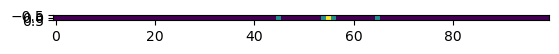

In [199]:
SdHQ = Sd@HQ
imshow(SdHQ)
nnz(SdHQ)

SHQ = S@HQ
imshow(SHQ)
nnz(SHQ)

Shape:  (100, 100)
nnz:  5
75
Shape:  (100, 100)
nnz:  5


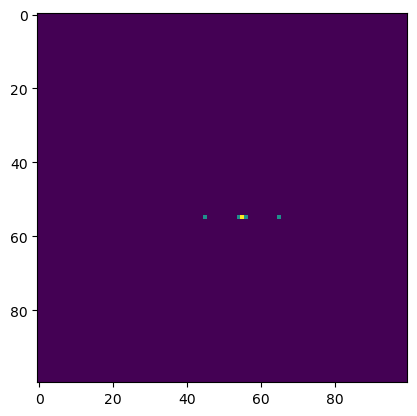

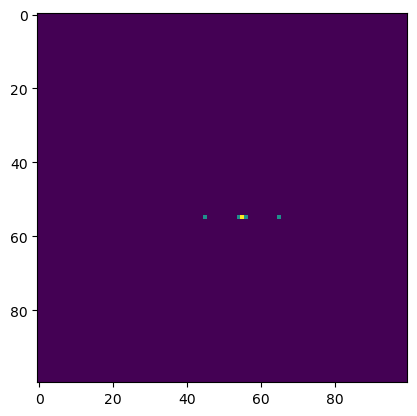

In [200]:
HSdHQ = H.T@SdHQ
imshow(HSdHQ)
nnz(HSdHQ)
print(15*5)

HSHQ = H.T@SHQ
imshow(HSHQ)
nnz(HSHQ)



Shape:  (100, 100)
nnz:  25
Shape:  (100, 100)
nnz:  25


(225, 75)

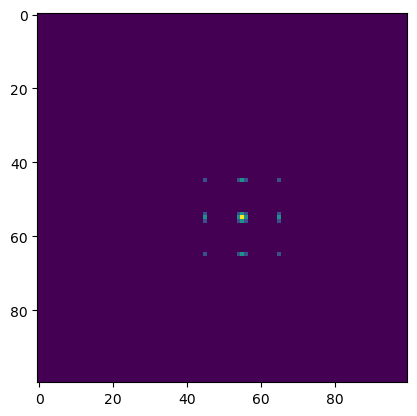

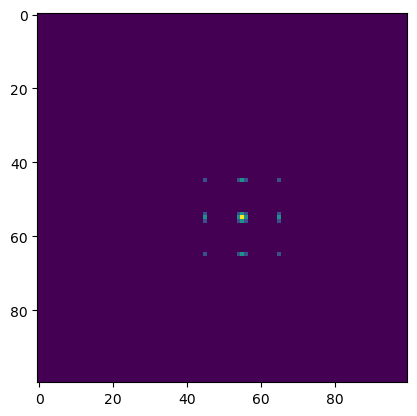

In [201]:
QHSdHQ = Q@HSdHQ
imshow(QHSdHQ)
nnz(QHSdHQ)

QHSHQ = Q@HSHQ
imshow(QHSHQ)
nnz(QHSHQ)
5*5*3*3, 5*5*3



In [215]:
HQ = H@Q
imshow(HTQ)
nnz(HTQ)

QHHQ= HQ.T@HQ
imshow(QHHQ)
#plt.colorbar()
nnz(QHHQ)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 1)

Test some sampling

In [161]:
x = np.random.multivariate_normal(np.zeros(Nstate), np.eye(Nstate), size=10000)
x.shape

(10000, 100)

In [168]:
x = Q@x.T

In [169]:
Qest = np.cov(x)
Qest.shape

(100, 100)

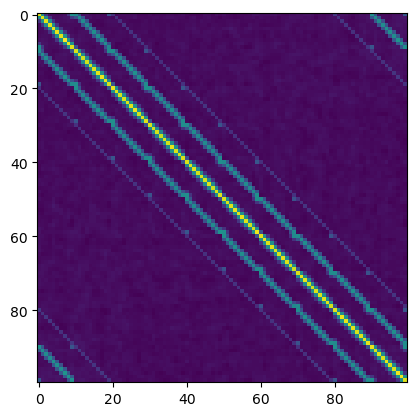

In [170]:
imshow(Qest)

In [216]:
13**2, 49**2

(169, 2401)

In [219]:
np.linspace(30, 80, 6)

array([30., 40., 50., 60., 70., 80.])